In [1]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 567E-9C80

 Directory of C:\Users\sowik\source\repos\NNVisualiser\data_analysis\projekt1

13.03.2019  10:15    <DIR>          .
13.03.2019  10:15    <DIR>          ..
12.03.2019  12:17    <DIR>          .ipynb_checkpoints
11.03.2019  19:45    <DIR>          classification
13.03.2019  10:23           377ÿ971 data_analysis.ipynb
13.03.2019  10:19            20ÿ274 multiclassification.ipynb
11.03.2019  19:45    <DIR>          regression
13.03.2019  10:23            55ÿ410 regression.ipynb
               3 File(s)        453ÿ655 bytes
               5 Dir(s)  144ÿ921ÿ571ÿ328 bytes free


In [2]:
import sys,os 
os.chdir('.\..\..')

In [3]:
import deep_nn.deep_nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [4]:
train = pd.read_csv("./data_analysis/projekt1/classification/data.three_gauss.train.100.csv")
len(train)

300

In [5]:
print(train.x[0])

0.493589159322043


In [6]:
X = train[['x', 'y']].values.reshape(2, len(train))
X.shape
y = train.cls.values.reshape(1, len(train))
y.shape

(1, 300)

In [7]:
enc = OneHotEncoder()
Y = enc.fit_transform(train.cls.values.reshape(-1,1))

c:\program files\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
from IPython.core.debugger import set_trace

In [ ]:
parameters, costs = nn.model(X, Y.T.A, 
         layers_dims=[2, 120, 50, 12, 7, 3],
         layers_activations=["relu", "relu", "relu", "relu", "relu", "softmax"], 
         cost_func="categorical_crossentropy",
         beta=0.0, num_epochs=25000, learning_rate=0.05)


Cost after epoch 0: 1.105330


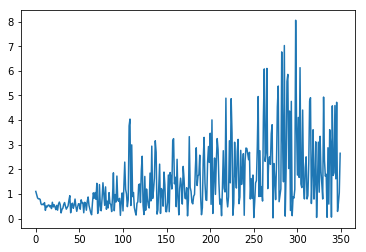

In [42]:
plt.plot(costs)

In [40]:
print(costs[-1])

0.9331148475188977


In [9]:
parameters2, costs2 = nn.model(X, Y.T.A, 
         layers_dims=[2, 12, 12, 12, 12, 3],
         layers_activations=["relu", "relu", "relu", "relu", "relu", "softmax"], 
         cost_func="categorical_crossentropy",
         beta=0.9, num_epochs=4001, learning_rate=0.1)

Cost after epoch 0: 1.099960
Cost after epoch 1000: 0.699530
Cost after epoch 2000: 0.422700
Cost after epoch 3000: 0.400557
Cost after epoch 4000: 0.309641


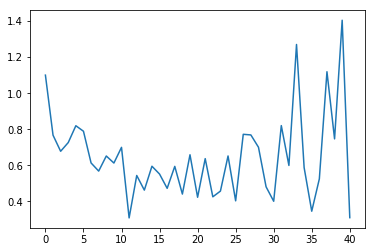

In [10]:
plt.plot(costs2)

In [20]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()
    

In [11]:
X.shape

(2, 300)

In [10]:
p = nn.predict(parameters2, X, ["relu", "relu", "relu", "relu", "relu", "softmax"])

> c:\users\sowik\source\repos\nnvisualiser\deep_nn\deep_nn.py(510)predict()
    508     # Forward propagation
    509     set_trace()
--> 510     probas, caches = L_model_forward(X, parameters, layers_activations=layers)
    511 
    512     return probas

ipdb> continue


In [11]:
p

array([[8.72125204e-01, 8.09446074e-01, 8.02834276e-01, 9.37949825e-01,
        8.88179129e-01, 9.80122908e-01, 4.03727845e-01, 6.89945560e-01,
        3.34981615e-01, 9.99242116e-01, 6.80256171e-01, 9.98613721e-01,
        6.82837858e-01, 1.87471953e-01, 9.99996380e-01, 9.95644782e-01,
        3.69250621e-01, 9.35805007e-01, 1.43681609e-01, 7.26901762e-01,
        5.69925434e-01, 9.95558674e-01, 6.09629178e-01, 3.60231952e-01,
        9.99996181e-01, 9.93929378e-01, 2.19009364e-01, 2.33267028e-01,
        1.84981951e-01, 9.98838130e-01, 9.99999741e-01, 9.91315228e-01,
        9.08661180e-03, 7.98259929e-01, 1.84111368e-02, 9.08871887e-01,
        7.53663000e-01, 3.60815730e-01, 2.05402447e-01, 9.83427749e-01,
        9.92362869e-01, 4.43707895e-01, 5.65312049e-01, 9.98628019e-01,
        9.25249907e-01, 8.75477871e-01, 4.37947006e-01, 9.94623856e-01,
        9.89211620e-01, 7.38925530e-01, 9.61886613e-01, 9.99696178e-01,
        3.38116077e-01, 8.93798382e-01, 6.64312007e-01, 9.958323

In [59]:
predicted_classes = np.argmax(p, axis=0) + 1

In [60]:
predicted_classes

array([1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 1, 1, 2, 3, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 3, 2,
       2, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1], d

In [32]:
print(y.T.shape)
print(X.T.shape)

(300, 1)
(300, 2)


In [44]:
indexer = (y.T == 1).reshape(-1,)

In [46]:
X.T[indexer].shape

(100, 2)

In [55]:
X.T[(y.T == 0).reshape(-1,)]

array([], shape=(0, 2), dtype=float64)

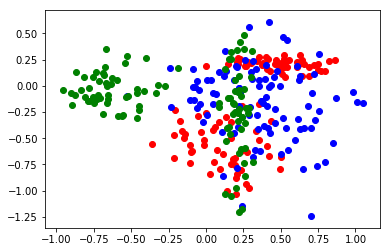

In [58]:
first_class_positions = X.T[(y.T == 1).reshape(-1,)]
second_class_positions = X.T[(y.T == 2).reshape(-1,)]
third_class_positions = X.T[(y.T == 3).reshape(-1,)]
plt.scatter(first_class_positions[:,0], first_class_positions[:,1] , c = 'red')
plt.scatter(second_class_positions[:,0], second_class_positions[:,1] , c = 'blue')
plt.scatter(third_class_positions[:,0], third_class_positions[:,1] , c = 'green')
plt.show()

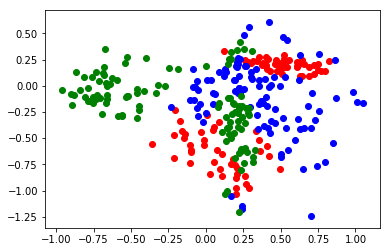

In [61]:
first_class_positions = X.T[(predicted_classes.T == 1).reshape(-1,)]
second_class_positions = X.T[(predicted_classes.T == 2).reshape(-1,)]
third_class_positions = X.T[(predicted_classes.T == 3).reshape(-1,)]
plt.scatter(first_class_positions[:,0], first_class_positions[:,1] , c = 'red')
plt.scatter(second_class_positions[:,0], second_class_positions[:,1] , c = 'blue')
plt.scatter(third_class_positions[:,0], third_class_positions[:,1] , c = 'green')
plt.show()

In [27]:
plot_decision_boundary(lambda x: nn.predict_dec(parameters, x.T), X, Y.A)

AssertionError: 

In [18]:
parameters, costs = nn.model(X, Y.T.A, 
         layers_dims=[2, 12, 12, 12, 12, 3],
         layers_activations=["relu", "relu", "relu", "relu", "relu", "softmax"], 
         cost_func="categorical_crossentropy",
         beta=0, learning_rate=0.01, num_epochs=50000, mini_batch_size=512)

Cost after epoch 0: 1.085441
Cost after epoch 1000: 1.040370
Cost after epoch 2000: 0.979691
Cost after epoch 3000: 0.907760
Cost after epoch 4000: 0.858196
Cost after epoch 5000: 0.819869
Cost after epoch 6000: 0.787479
Cost after epoch 7000: 0.762739
Cost after epoch 8000: 0.745079
Cost after epoch 9000: 0.732193
Cost after epoch 10000: 0.721790
Cost after epoch 11000: 0.710878
Cost after epoch 12000: 0.701160
Cost after epoch 13000: 0.692021
Cost after epoch 14000: 0.682882
Cost after epoch 15000: 0.673991
Cost after epoch 16000: 0.664723
Cost after epoch 17000: 0.655988
Cost after epoch 18000: 0.647905
Cost after epoch 19000: 0.639810
Cost after epoch 20000: 0.630993
Cost after epoch 21000: 0.621779
Cost after epoch 22000: 0.612819
Cost after epoch 23000: 0.603741
Cost after epoch 24000: 0.595143
Cost after epoch 25000: 0.587468
Cost after epoch 26000: 0.580865
Cost after epoch 27000: 0.575762
Cost after epoch 28000: 0.573358
Cost after epoch 29000: 0.574060
Cost after epoch 30000:

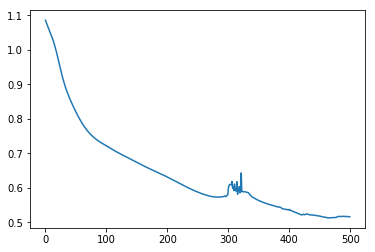

In [19]:
plt.plot(costs)